In [ ]:
pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Boston = load_data('Boston')

des = MS(['lstat'])
X = des.fit_transform(Boston)

y = Boston['medv']
model = sm.OLS(y , X)
results = model.fit()

new_df = pd.DataFrame({'lstat':[5 , 10 , 15]})
newX = des.transform(new_df)
newX

new_predictions = results.get_prediction(newX)
new_predictions.conf_int(obs=True , alpha=0.05)

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b , m * xlim[1] + b]
  ax.plot(xlim , ylim , *args , **kwargs)

# ax = Boston.plot.scatter('lstat' , 'medv')
# abline(ax , results.params[0] , results.params[1] , 'r--' , linewidth=2)

infl = results.get_influence()
ax = plt.subplots(figsize = (8,8))[1]
ax.scatter(np.arange(X.shape[0]) , infl.hat_matrix_diag)
ax.set_xlabel('index')
ax.set_ylabel('leverage')
np.argmax(infl.hat_matrix_diag)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Boston = load_data('Boston')

des = MS(Boston.columns.drop(['medv' , 'age']))
X = des.fit_transform(Boston)

y = Boston['medv']
model = sm.OLS(y , X)
results = model.fit()
summarize(results)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Boston = load_data('Boston')

des = MS(Boston.columns.drop(['medv']))
X = des.fit_transform(Boston)

y = Boston['medv']
model = sm.OLS(y , X)
results = model.fit()
summarize(results)

vals = [VIF(X , i) for i in range(1 , X.shape[1])]
vif = pd.DataFrame({'vif':vals} , index = X.columns[1:])
vif

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Boston = load_data('Boston')

des = MS([poly('lstat' , degree=2) , 'age'])
X = des.fit_transform(Boston)

y = Boston['medv']
model = sm.OLS(y , X)
results = model.fit()
summarize(results)

des = MS(['lstat' , 'age'])
X = des.fit_transform(Boston)

y = Boston['medv']
model = sm.OLS(y , X)
results2 = model.fit()
summarize(results2)

anova_lm(results , results2)

ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues , results2.resid)
ax.set_xlabel('fitted value')
ax.set_ylabel('residuals')
ax.axhline(0,c='k' , ls='--')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Carseats = load_data('Carseats')

allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income' , 'Advertising') , ('Price' , 'Age')]

X = MS(final).fit_transform(Carseats)
model = sm.OLS(y , X)
summarize(model.fit())

## Excercise: Applied

### 8:


- (a):
  - i. There's a relationship between horsepower and mpg, is that the higher the horsepower, the lower the mpg.
  - ii. We can calculate the correlation $Cor(X , Y) = -0.77$ to conclude there's a very strong relationship between them.
  - iii. Based on the value of the $Cor(X , Y)$, we can see it's negative since it is lower than 0.
  - iv.
    - Confident Interval: [23.97307896, 24.96107534]
    - Prediction Interval: [14.80939607, 34.12475823]
    - Predicted mpg = 24.46707715 is associated with horsepower = 98

- (b): The plot is generated in the second code belows
- (c): I generated 2 plots:
  - Fitted values - Residuals
  - Leverage - Index

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']

design = MS(['horsepower'])
X = design.fit_transform(Auto)
model = sm.OLS(Y , X)
result = model.fit()
summarize(result)

pred = pd.DataFrame({'horsepower' : [98]})
X = design.transform(pred)
print(X)
new_pred = result.get_prediction(X)

new_pred.predicted_mean
#new_pred.conf_int(alpha=0.05)
#new_pred.conf_int(obs=1,alpha=0.05)

   intercept  horsepower
0        1.0          98


array([24.46707715])

               coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0


/tmp/ipython-input-4248429712.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax , result.params[0] , result.params[1] , 'r--' , linewidth=3)


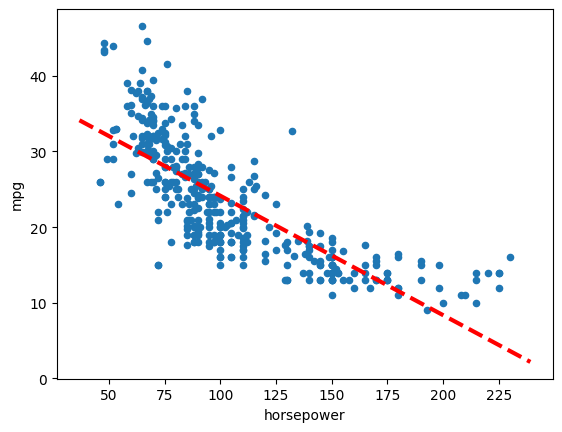

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']

design = MS(['horsepower'])
X = design.fit_transform(Auto)
model = sm.OLS(Y , X)
result = model.fit()
print(summarize(result))

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b , m * xlim[1] + b]
  ax.plot(xlim , ylim , *args , **kwargs)

ax = Auto.plot.scatter('horsepower' , 'mpg')
abline(ax , result.params[0] , result.params[1] , 'r--' , linewidth=3)

               coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0


np.int64(115)

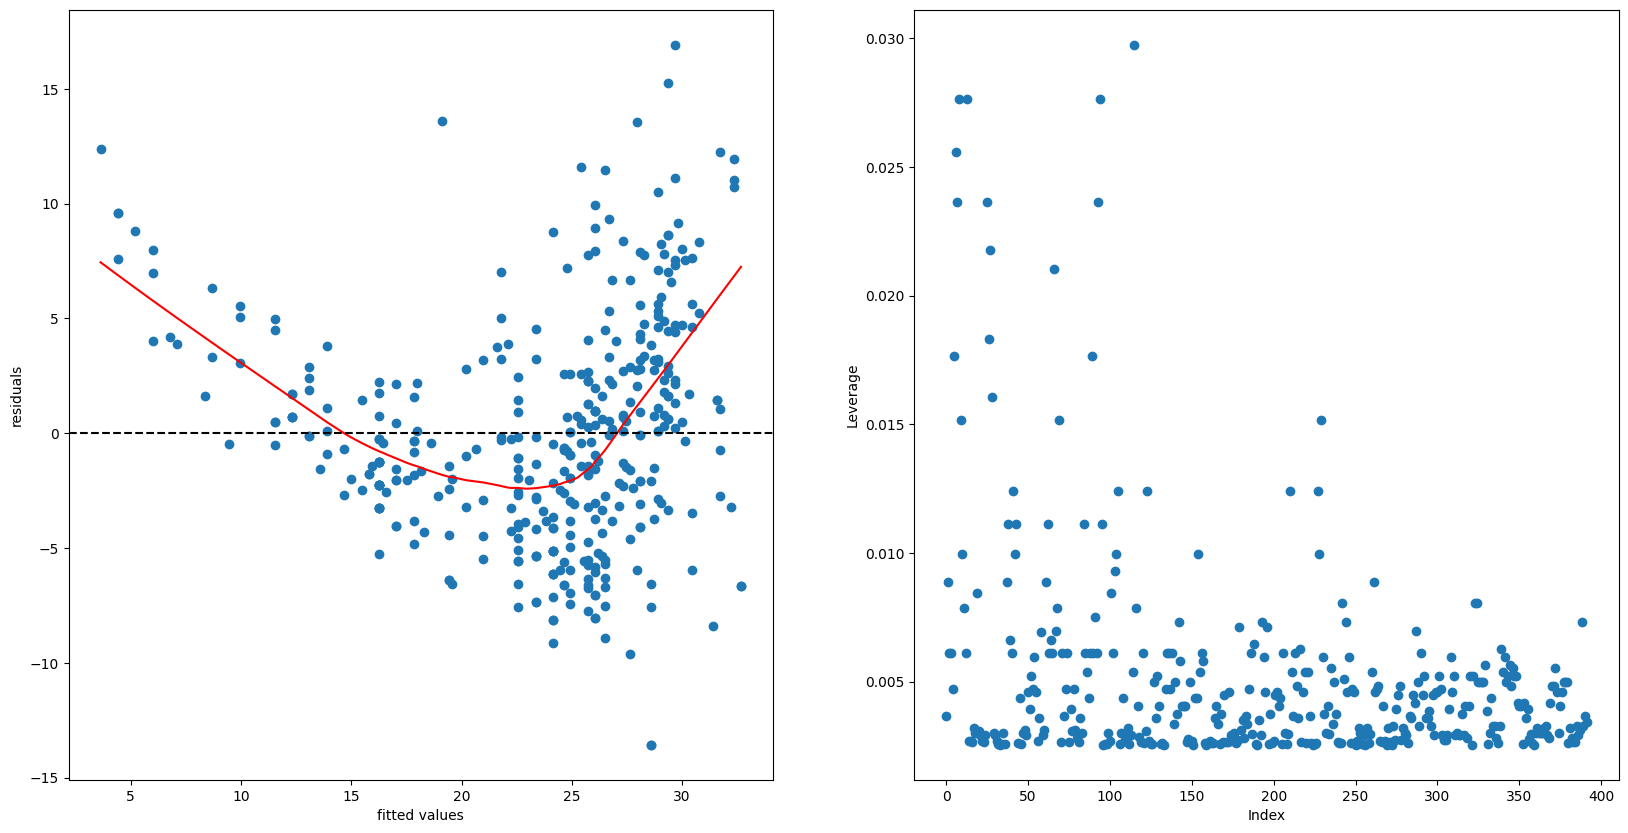

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']

design = MS(['horsepower'])
X = design.fit_transform(Auto)
model = sm.OLS(Y , X)
result = model.fit()
print(summarize(result))

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b , m * xlim[1] + b]
  ax.plot(xlim , ylim , *args , **kwargs)


ax = plt.subplots(1 , 2 , figsize=(20 , 10))[1]
ax[0].plot(result.fittedvalues , result.resid , 'o')
low = sm.nonparametric.lowess(result.resid , result.fittedvalues)
ax[0].plot(low[:,0] , low[:,1] , color = 'red')
ax[0].set_xlabel('fitted values')
ax[0].set_ylabel('residuals')
ax[0].axhline(0 , c='k' , ls='--')

ifl = result.get_influence()
ax[1].scatter(np.arange(X.shape[0]) , ifl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(ifl.hat_matrix_diag)

### 9:

- (a): first below code
- (b): second below code
- (c):
  - i. Yes it is, F-statisitc = 252.4 so that we can reject the null hypothesis.
  - ii. Displacement, Year , Origin, Weight since p-value < 0.05.
  - iii. +1 year => + 0.7508 mpg
- (d) Generated:
  - Fitted values - Residuals
  - Index - Leverage
- (e) There are some interations like:
  - horsepower - acceleration
  - displacement - acceleration
  - ...
- (f): I tried with messing with horsepower:
  - squared: SSR = 3348
  - log: SSR = 3354
  - sqrt: SSR = 3357
  
  This doesn't say anything because the regression might overfitting the tranning data.


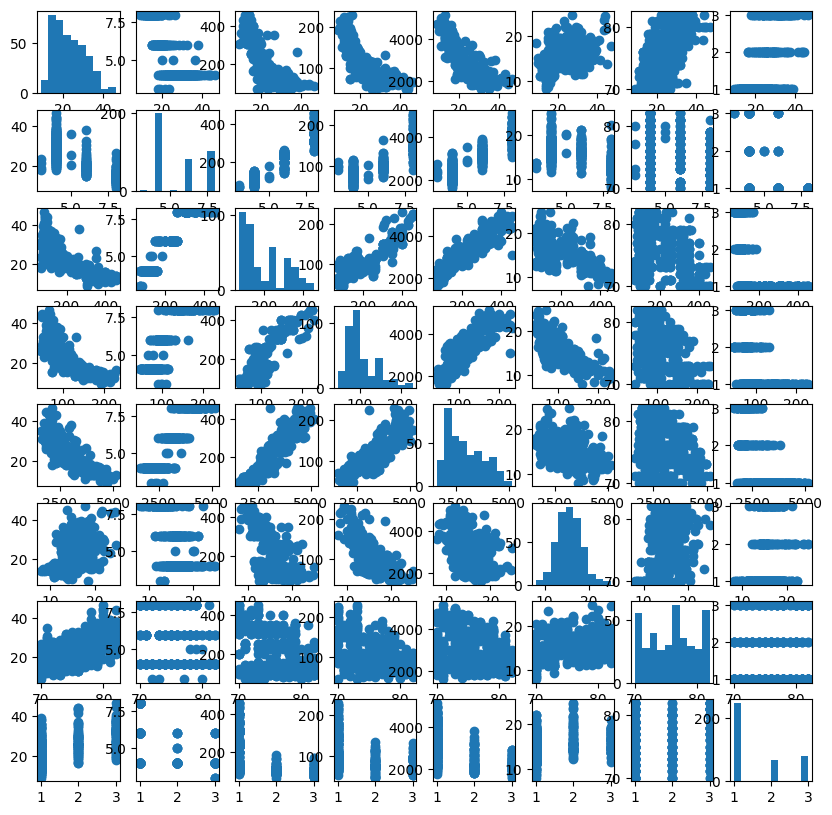

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Auto.columns

ax = plt.subplots(8 , 8 , figsize=(10 , 10))[1]

for i in range(0 , 8):
  for j in range(0 , 8):
    if i != j :
      ax[i , j].scatter(Auto[Auto.columns[i]] , Auto[Auto.columns[j]])
    else:
      ax[i , j].hist(Auto[Auto.columns[i]])

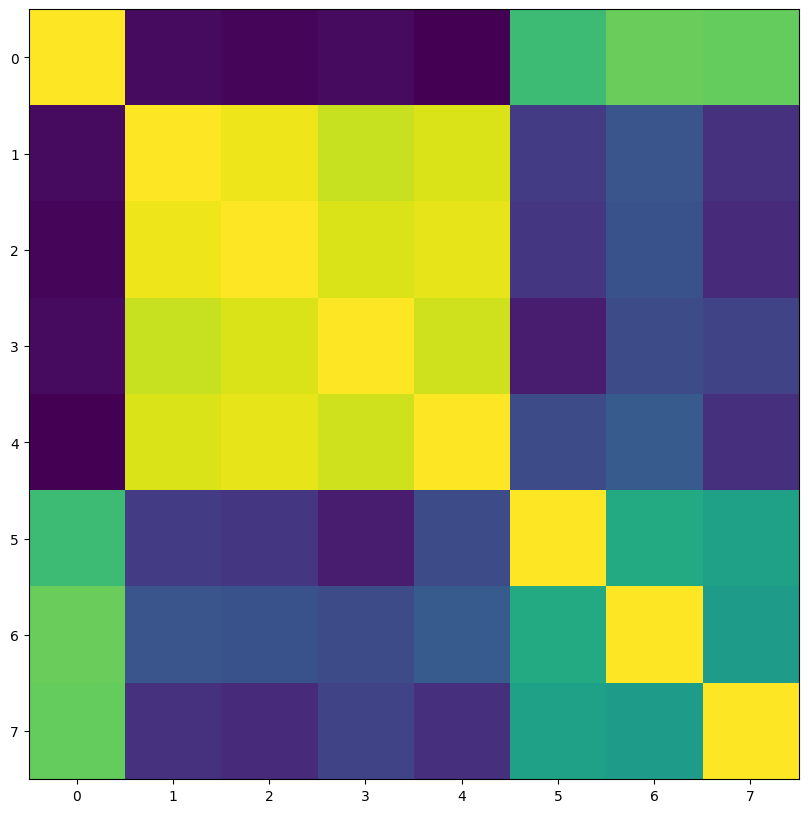

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Auto.columns


ax = plt.subplots(figsize=(10 , 10))[1]
ax.imshow(Auto.corr())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']
X = MS(Auto.columns.drop('mpg')).fit_transform(Auto)

model = sm.OLS(Y , X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

Auto = load_data('Auto')

Y = Auto['mpg']
X = MS(Auto.columns.drop('mpg')).fit_transform(Auto)

import statsmodels.formula.api as smf

# Fit mô hình dùng công thức
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=Auto)
result = model.fit()

# ANOVA
anova_result = anova_lm(result)
print(anova_result)



                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']
X = MS(Auto.columns.drop('mpg')).fit_transform(Auto)

model = sm.OLS(Y , X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          2.04e-139
Time:                        15:40:01   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

np.int64(13)

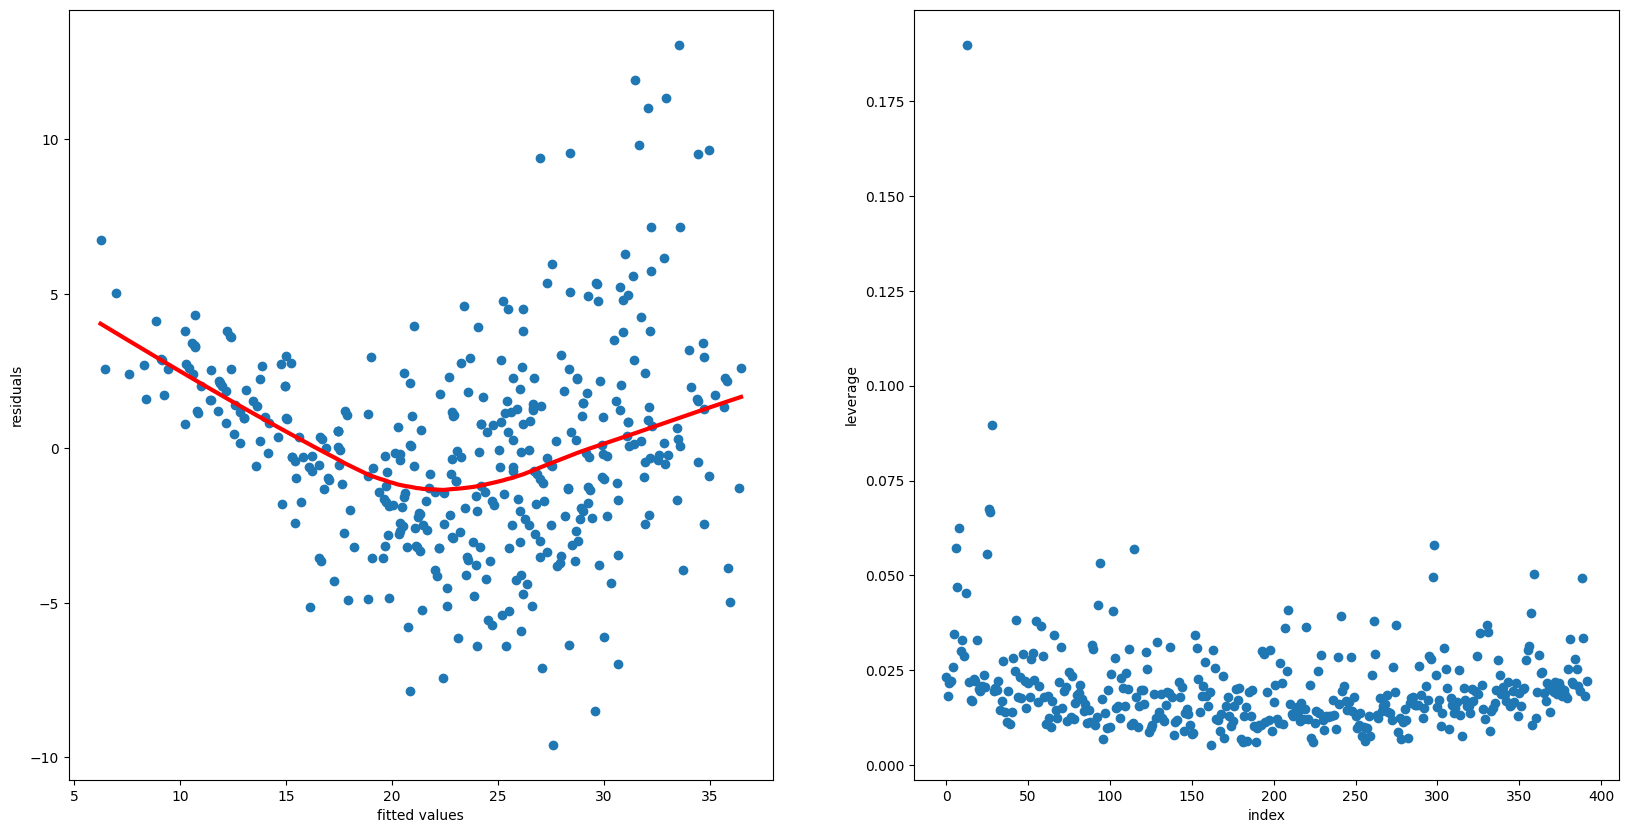

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']
X = MS(Auto.columns.drop('mpg')).fit_transform(Auto)

model = sm.OLS(Y , X)
result = model.fit()
low = sm.nonparametric.lowess(result.resid , result.fittedvalues)

ax = plt.subplots(1 , 2 , figsize = (20 , 10))[1]
ax[0].set_xlabel('fitted values')
ax[0].set_ylabel('residuals')
ax[0].plot(result.fittedvalues , result.resid , 'o')
ax[0].plot(low[: , 0] , low[: , 1] , color = 'red' , linewidth = 3)

infl = result.get_influence()
ax[1].plot(np.arange(X.shape[0]) , infl.hat_matrix_diag , 'o')
ax[1].set_xlabel('index')
ax[1].set_ylabel('leverage')
np.argmax(infl.hat_matrix_diag)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

Auto = load_data('Auto')

Y = Auto['mpg']
lst = []
for i in Auto.columns:
  if i == 'mpg':
    continue
  lst.append(i)

X = MS(lst).fit_transform(Auto)
#X['log_horsepower'] = np.log(Auto['horsepower'])
X['sqrt_horsepower'] = np.sqrt(Auto['horsepower'])
#X['squared_horsepower'] = Auto['horsepower']**2
model = sm.OLS(Y , X)
result = model.fit()

XX = MS(Auto.columns.drop('mpg')).fit_transform(Auto)

model2 = sm.OLS(Y , XX)

result2 = model2.fit()

anova_lm(result2 , result)
# anova_lm(submodel , large model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3357.260575,1.0,894.951956,102.097109,1.953003e-21


### 10:

- (a): Coefficents are displayed below

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Carseats')

Y = data['Sales']
X = MS(['Price' , 'Urban' , 'US'])

model = sm.OLS(Y , X.fit_transform(data))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           2.39e-23
Time:                        08:23:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- (b): Interpret:
  - Coefficent for Price displays that for each +1 in Price means -0.0545 in Sales.
  - ... for Urban, which is a qualitative predictor, says that Urban = 'Yes' means -0.0219 in Sales and Urban = 'No' doesn't effect Sales/
  - ... for US, qualitative predictor too, illustrates that US = 'YES" equals +1.2006 in Sales and US = 'NO' does not add anything to Sales.  

- (c): Equation Form:
$$\begin{cases}
  \text{Urban = YES & US = YES} , \hspace{20px}f(Sales) = 13.0435 - 0.0219 + 1.2006 - 0.0545 \cdot Price \\
  \text{Urban = YES & US = NO} , \hspace{27px} f(Sales) = 13.0435 - 0.0219 - 0.0545 \cdot Price \\
  \text{Urban = NO & US = YES} , \hspace{27px} f(Sales) = 13.0435 + 1.2006 - 0.0545 \cdot Price \\
  \text{Else}, \hspace{215px} f(Sales) = 13.0435 - 0.0545 \cdot Price\\
\end{cases}$$

- (d): For the predictors we can reject the null hypothesis: Price, US since the p-value is so small, smaller the 0.001

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Carseats')

Y = data['Sales']
X = MS(['Price' , 'US'])

model = sm.OLS(Y , X.fit_transform(data))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           2.66e-24
Time:                        08:40:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- (e): I removed the 'Urban' predictor and made a model in the code above.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Carseats')

Y = data['Sales']
X1 = MS(['Price' , 'US'])

model1 = sm.OLS(Y , X1.fit_transform(data))
result1 = model1.fit()
result1.summary()

X2 = MS(['Price' , 'Urban' , 'US'])

model2 = sm.OLS(Y , X2.fit_transform(data))
result2 = model2.fit()
result2.summary()

anova_lm(result1 , result2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,2420.874462,0.0,NaN,NaN,NaN
1,396.0,2420.834671,1.0,0.03979,0.006509,0.935739


- (f): Using anova_lm(), I calculated the SSR of 2 models so we can see that those 2 are almost identical.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Carseats')

Y = data['Sales']
X = MS(['Price' , 'US'])
des = X.fit_transform(data)
model = sm.OLS(Y , des)
result = model.fit()

result.conf_int(alpha = 0.05)


,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


- (g): The CI for coefficents are displays above.

np.int64(42)

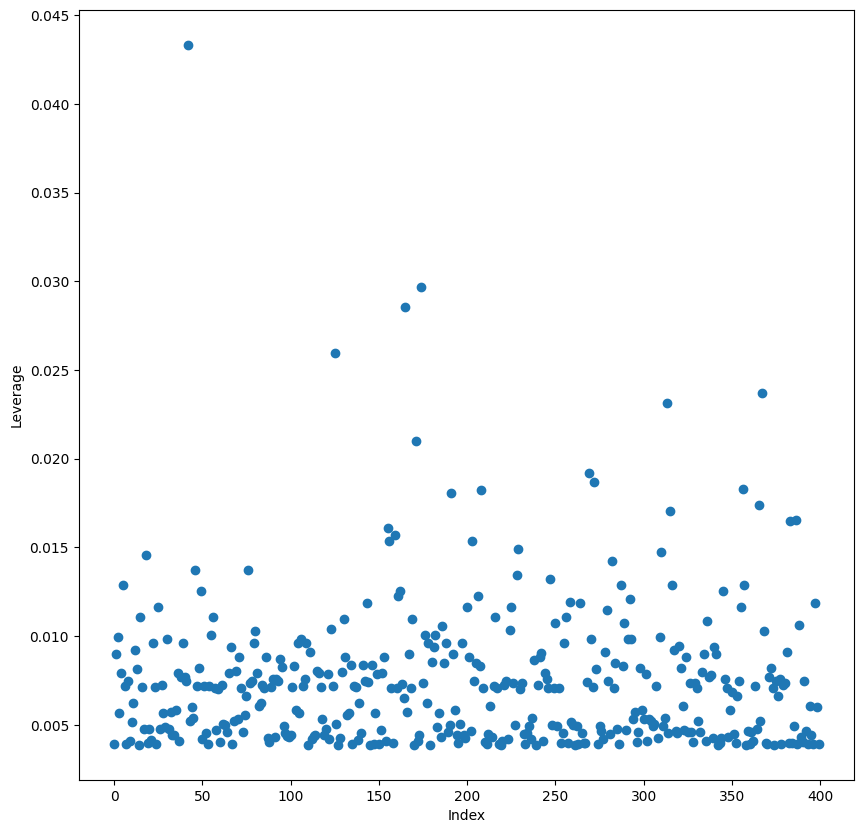

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Carseats')

Y = data['Sales']
X = MS(['Price' , 'US'])
des = X.fit_transform(data)
model = sm.OLS(Y , des)
result = model.fit()

infl = result.get_influence()
ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(np.arange(data.shape[0]) , infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

np.argmax(infl.hat_matrix_diag)

- (h): The leverage - index plot has been generated above, we can see that the observation no.42 is a high leverage point.

### 11:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

data = pd.DataFrame({'X' : x , 'Y' : y})

Y = data['Y']
X = MS('X' , intercept = False).fit_transform(data)
model = sm.OLS(Y , X)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 02 Sep 2025   Prob (F-statistic):                    6.23e-31
Time:                        08:06:53   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- (a): coef, stderr, t-statistic, p-value can be seen above. Comments
  - ceof = 1.9762 means +1 X $\Rightarrow$ + 1.9762 Y
  - stderr = 0.117 means the error range is small.
  - t-statistic = 16.898 and p-value < 0.001 so we can reject the null hypothesis, it means that Y is statisticly important to X   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

data = pd.DataFrame({'X' : x , 'Y' : y})

Y = data['X']
X = MS('Y' , intercept = False).fit_transform(data)
model = sm.OLS(Y , X)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      X   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 02 Sep 2025   Prob (F-statistic):                    6.23e-31
Time:                        08:07:10   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- (b): coef, stderr, t-statistic, p-value can be seen above. Comments
  - ceof = 0.3757 means +1 X $\Rightarrow$ + 1.9762 Y
  - stderr = 0.022 means the error range is small.
  - t-statistic = 16.898 and p-value < 0.001 so we can reject the null hypothesis, it means that Y is statisticly important to X  

- (c): Based on the generate method of X and Y arrays we can see that:
  - $Y = 2 \cdot X + ϵ$
  - $\Leftrightarrow X = 0.5 \cdot(Y - ϵ)$

    In this situation, $\epsilon = -0.0119$.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

data = pd.DataFrame({'X' : x , 'Y' : y})

Y = data['Y']
X = MS('X').fit_transform(data)
model = sm.OLS(Y , X)
result = model.fit()

print(result.summary())

Y2 = MS('Y').fit_transform(data)
X2 = data['X']
model2 = sm.OLS(Y , X)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.74e-30
Time:                        06:06:15   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0760      0.101     -0.756      0.4

- (f): As we can see in above, R-squared is the same for both of the regressions.

### 12:

- (a): The coefficents are equal to each other is when:
$$\sum_{i = 1}^{n}x_i^2 = \sum_{i = 1}^{n}y_i^2$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = rng.normal(size=100)

data = pd.DataFrame({'X' : x , 'Y' : y})

Y = data['Y']
X = MS('X'  , intercept = False).fit_transform(data)
model = sm.OLS(Y , X)
result = model.fit()

print(result.summary())

Y2 = MS('Y' , intercept = False).fit_transform(data)
X2 = data['X']
model2 = sm.OLS(X , Y)
result2 = model2.fit()
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.04127
Date:                Thu, 04 Sep 2025   Prob (F-statistic):                       0.839
Time:                        07:09:49   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- (b) Based on (a), we just need to generate 2 array that has different sum of squares.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x[::-1]

data = pd.DataFrame({'X' : x , 'Y' : y})

print(data)

Y = data['Y']
X = MS('X'  , intercept = False).fit_transform(data)
model = sm.OLS(Y , X)
result = model.fit()

print(result.summary())

Y2 = MS('Y' , intercept = False).fit_transform(data)
X2 = data['X']
model2 = sm.OLS(Y , X)
result2 = model2.fit()
print(result2.summary())

           X         Y
0   0.345584  0.332814
1   0.821618 -1.425349
2   0.330437  0.033000
3  -1.303157 -0.138655
4   0.905356 -2.250854
..       ...       ...
95 -2.250854  0.905356
96 -0.138655 -1.303157
97  0.033000  0.330437
98 -1.425349  0.821618
99  0.332814  0.345584

[100 rows x 2 columns]
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.1612
Date:                Thu, 04 Sep 2025   Prob (F-statistic):                       0.689
Time:                        07:10:02   Log-Likelihood:                         -126.12
No. Observations:                 100   AIC:                                      254.2
Df Residuals:                      99   BIC:                                      25

- (c): Based on (a), the condition equals sum of squares is needed so the easiest way is to Y = random shuffle of X.  

### 13:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 0.25 , 100)
y = -1 + 0.5 * x + eps



- (a), (b): Generated on the code above
- (c): Based on the regresssion:
$$Y = -1 + 0.5 \cdot X + ϵ$$

    $\beta_0 = -1 , \beta_1 = 0.5$

Text(0, 0.5, 'Y')

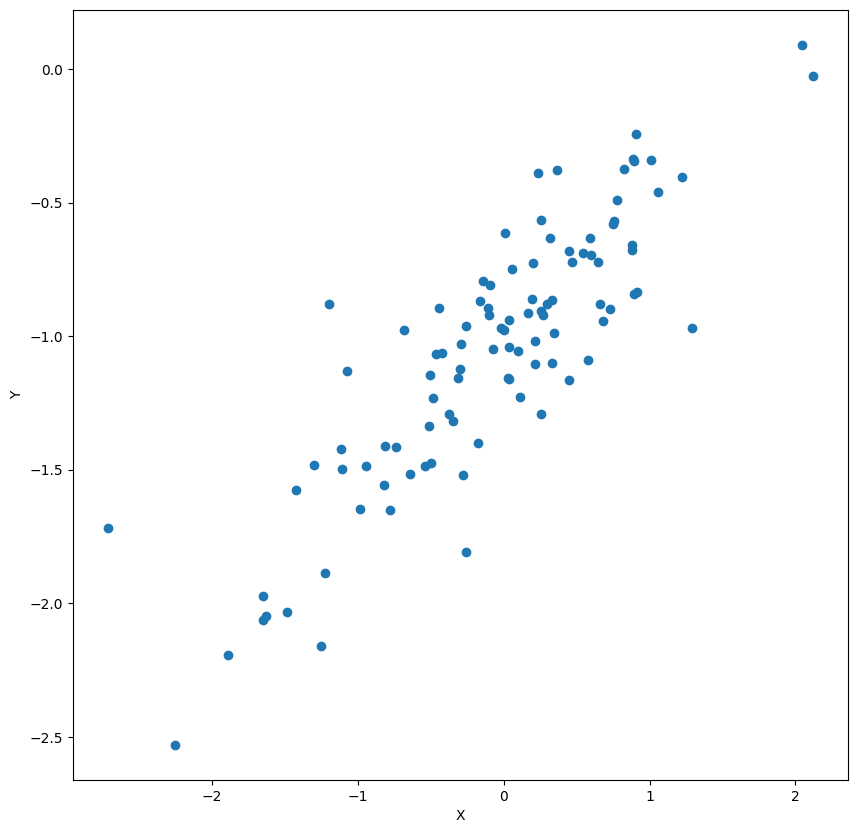

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 0.25 , 100)
y = -1 + 0.5 * x + eps

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x , y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

- (d): The plot was created above to comment:
  - There somewhat linearity in the relationship between X and Y, this can be explained by the generate method.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           1.74e-30
Time:                        04:19:19   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.0

/tmp/ipython-input-2394205569.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)


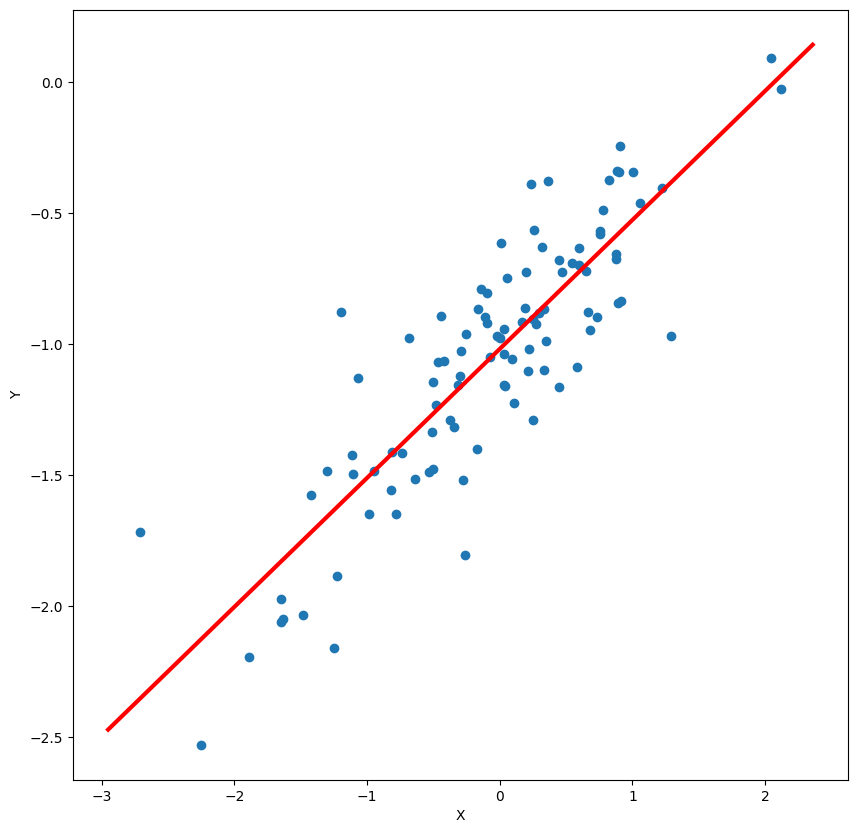

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 0.25 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS('X').fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [b + m * xlim[0] , b + m * xlim[1]]
  ax.plot(xlim , ylim , *args , **kwargs)

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x , y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
abline(ax , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)

- (e): In the linear regression
$$Y = -1.0190 + 0.4921 \cdot X + ϵ$$
  This is pretty close to the model we used to generate Y since $\beta_0 = -1 , \beta_1 = 0.5$ and $\hat{\beta_0} = -1.0190 , \hat{\beta_1} = 0.4921$

/tmp/ipython-input-2410088867.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)


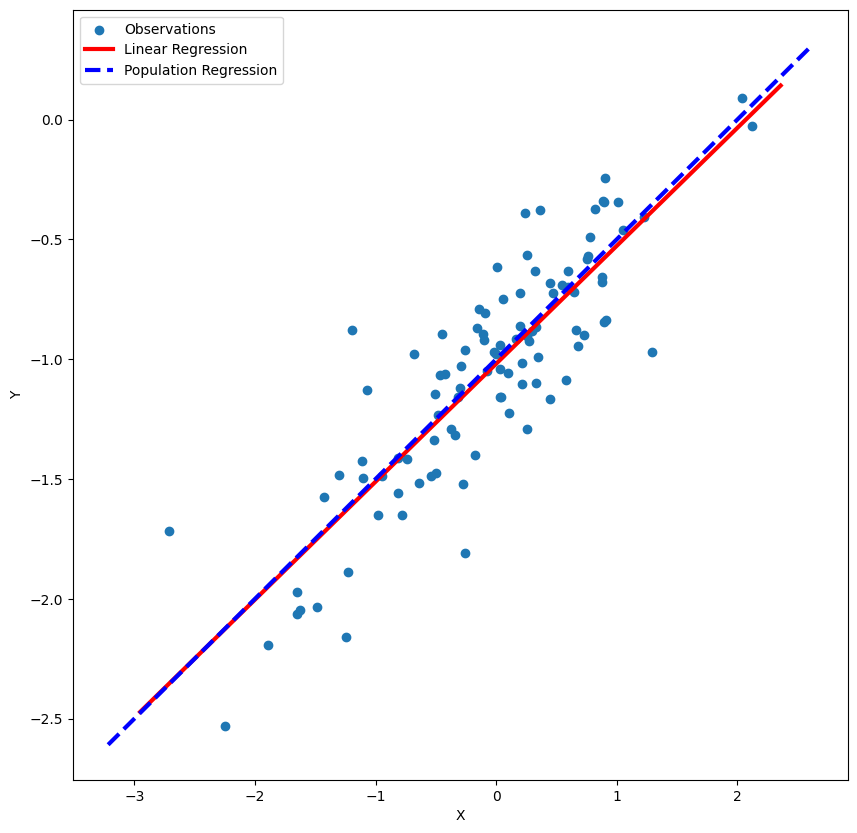

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 0.25 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS('X').fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [b + m * xlim[0] , b + m * xlim[1]]
  ax.plot(xlim , ylim , *args , **kwargs)

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x , y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
abline(ax , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)
abline(ax , -1 , 0.5 , color = 'blue' , linewidth = 3 , ls = '--')
ax.legend(['Observations' , 'Linear Regression' , 'Population Regression'])

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 0.25 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS([poly('X' , degree = 2)]).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           3.66e-29
Time:                        04:19:10   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.0552 

- (g): Since the p-value for the term $X^2$ is so large $≈ 0.959$ so we can accept the null hypothesis and conclude the polynomial term doesn't improve the regression.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 0 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS(['X']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.640e+32
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:19:08   Log-Likelihood:                 3463.0
No. Observations:                 100   AIC:                            -6922.
Df Residuals:                      98   BIC:                            -6917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0000   2.24e-17  -4.46e+16      0.0

- (h): I generated the eps with variance = 0 so that means error will always be 0 so that the Linear Regression will be the same as the Population Regression. So I accidentally done this subquestion.



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 2 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS(['X']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.452
Date:                Fri, 05 Sep 2025   Prob (F-statistic):             0.0662
Time:                        04:19:06   Log-Likelihood:                -210.37
No. Observations:                 100   AIC:                             424.7
Df Residuals:                      98   BIC:                             430.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1521      0.201     -5.729      0.0

- (i): I again generated the eps with a bigger variance for more noise.

Text(0, 0.5, 'Y')

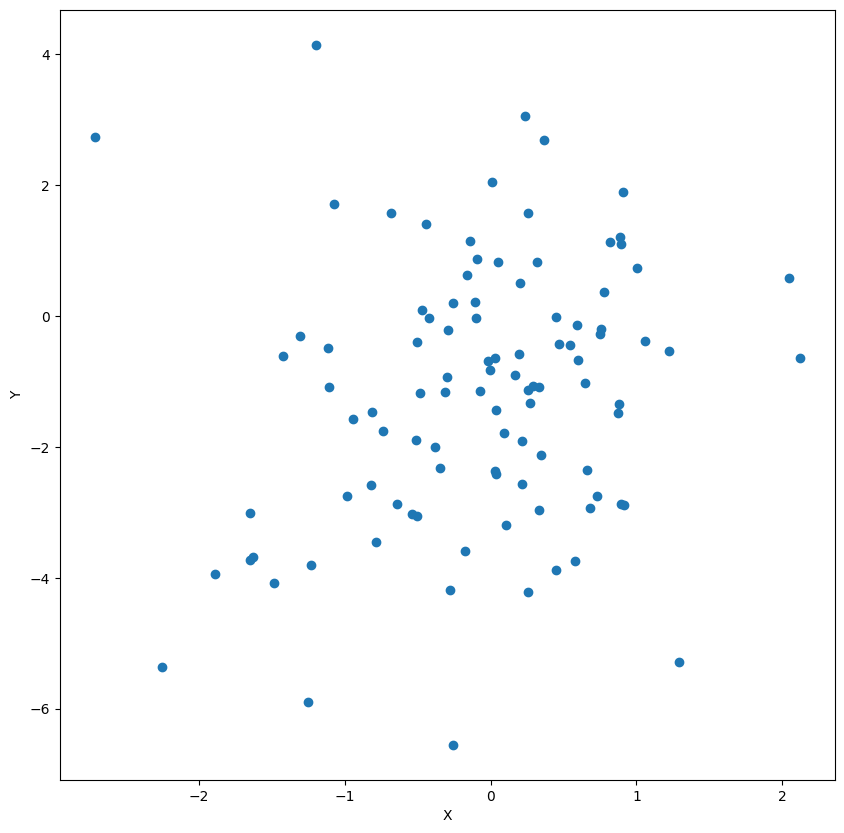

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 2 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS(['X']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
#print(result.summary())

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x , y)
ax.set_xlabel('X')
ax.set_ylabel('Y')



- $\text{(i)}_\text{d}$: Because the data has more noise intentionally so the observations are more evenly spread.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.452
Date:                Fri, 05 Sep 2025   Prob (F-statistic):             0.0662
Time:                        04:19:03   Log-Likelihood:                -210.37
No. Observations:                 100   AIC:                             424.7
Df Residuals:                      98   BIC:                             430.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1521      0.201     -5.729      0.0

/tmp/ipython-input-3400152518.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)


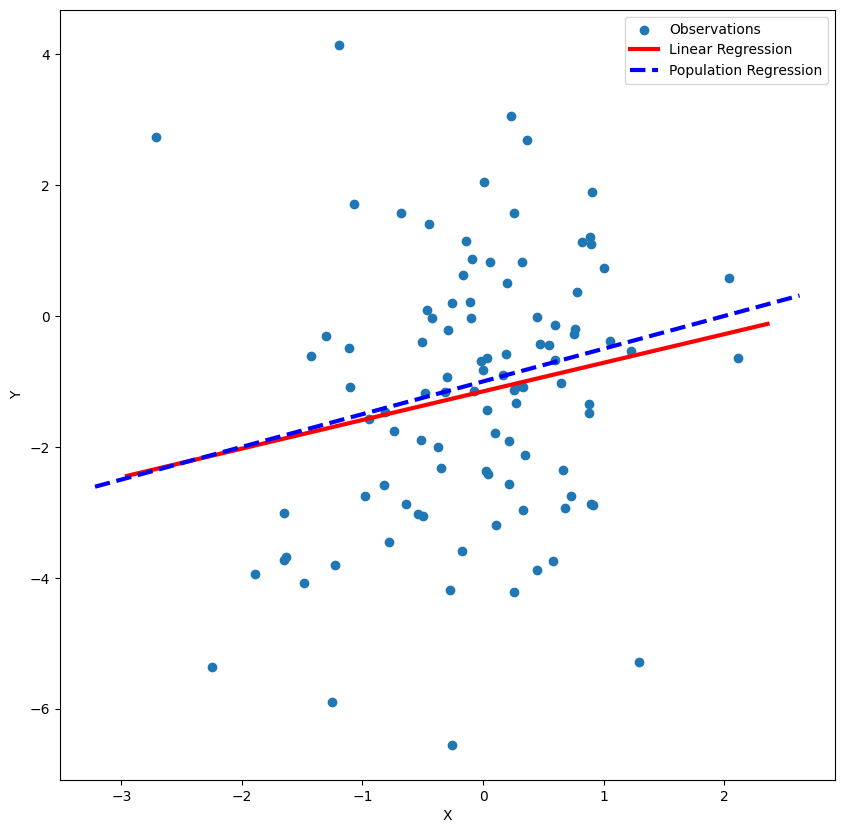

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 2 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS('X').fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [b + m * xlim[0] , b + m * xlim[1]]
  ax.plot(xlim , ylim , *args , **kwargs)

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x , y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
abline(ax , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)
abline(ax , -1 , 0.5 , color = 'blue' , linewidth = 3 , ls = '--')
ax.legend(['Observations' , 'Linear Regression' , 'Population Regression'])

- $\text{(i)}_\text{e}$: $\hat{β}_0 = -1.1521$ , $\hat{β}_1 = 0.4372$

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps = rng.normal(0 , 2 , 100)
y = -1 + 0.5 * x + eps

data = pd.DataFrame({'X' : x , 'Y' : y})

des = MS([poly('X' , degree = 2)]).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

des2 = MS(['X']).fit_transform(data)
model2 = sm.OLS(y , des2)
result2= model2.fit()

anova_lm(result2 , result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.710
Date:                Fri, 05 Sep 2025   Prob (F-statistic):              0.186
Time:                        04:19:01   Log-Likelihood:                -210.37
No. Observations:                 100   AIC:                             426.7
Df Residuals:                      97   BIC:                             434.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.1842 

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,393.385076,0.0,NaN,NaN,NaN
1,97.0,393.374174,1.0,0.010901,0.002688,0.958757


- $\text{(i)}_\text{g}$: p-value too large and there are no major improvement in SSR.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(1)
x = rng.normal(0 , 1 , 100)
eps1 = rng.normal(0 , 0.25 , 100)
eps2 = rng.normal(0 , 0 , 100)
eps3 = rng.normal(0 , 2 , 100)
y1 = -1 + 0.5 * x + eps1
y2 = -1 + 0.5 * x + eps2
y3 = -1 + 0.5 * x + eps3

data1 = pd.DataFrame({'X' : x , 'Y' : y1})
data2 = pd.DataFrame({'X' : x , 'Y' : y2})
data3 = pd.DataFrame({'X' : x , 'Y' : y3})

des1 = MS(['X']).fit_transform(data1)
model1 = sm.OLS(y1 , des1)
result1 = model1.fit()
print(result1.conf_int())

des2 = MS(['X']).fit_transform(data2)
model2 = sm.OLS(y2 , des2)
result2 = model2.fit()
print(result2.conf_int())

des3 = MS(['X']).fit_transform(data3)
model3 = sm.OLS(y3 , des3)
result3 = model3.fit()
print(result3.conf_int())

                  0         1
intercept -1.068891 -0.969122
X          0.433783  0.550508
             0    1
intercept -1.0 -1.0
X          0.5  0.5
More Noise: 
                  0         1
intercept -1.365422 -0.671214
X          0.387892  1.200085


- (j): 1st is the original data, 2nd is less noise, 3rd is more noise.

### 14:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

- (a): The model is:
$$Y = 2 + 2 \cdot X_1 + 0.3 \cdot X_2 + ϵ$$

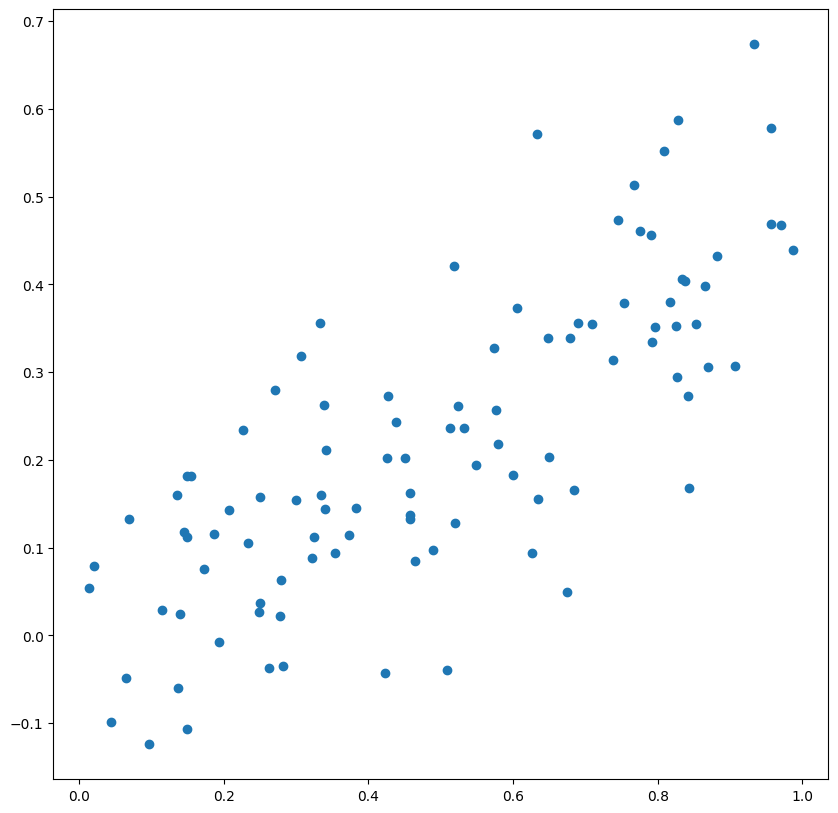

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x1 , x2)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

data.corr()

,X1,X2
X1,1.000000,0.772324
X2,0.772324,1.000000


- (b): $Cor(X_1 , X_2) = 0.7723$

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

des = MS(['X1' , 'X2']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           5.76e-08
Time:                        06:02:16   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.0

- (c):
  - Linear Regression predicting y using x1 and x2:
  $$y = 1.9579 + 1.6154 \cdot X_1 + 0.9428 \cdot X_2$$

    $\hat{\beta_0} = 1.9579$, $\hat{\beta_1} = 1.6154$, $\hat{\beta_0} = 0.9428$.
  - In the result above:
    - p-value for $\beta_1 = 0.003$, which is small enough so we can reject the null hypothesis
    - p-value for $\beta_2 = 0.259$, which is large so the null hypothesis can be accepted.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

des = MS(['X1']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           1.37e-08
Time:                        05:59:06   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.0

- (d): p-value is small so we can reject the null hypothesis.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

des = MS(['X2']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           7.43e-07
Time:                        05:59:55   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.0

- (e): p-value is small so we can reject the null hypothesis.
- (f): Since the regresion to predict y by using x2 only contain one parameter so x2 has to be important to the regression elsewhere the regression would just be a straight line y = intercept, which is kinda silly.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

des = MS(['X1' , 'X2']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           4.60e-08
Time:                        06:02:28   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.0

- $\text{(g)}_\text{c}$:
  - Linear Regression predicting y using x1 and x2:
  $$y = 2.0618 + 0.8575 \cdot X_1 + 2.2663 \cdot X_2$$

    $\hat{\beta_0} = 2.0618$, $\hat{\beta_1} = 0.8575$, $\hat{\beta_0} = 2.2663$.
  - In the result above:
    - p-value for $\beta_1 = 0.069$, which is large enough so we can accept the null hypothesis
    - p-value for $\beta_2 = 0.002$, which is small so the null hypothesis can be rejected.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           9.23e-07
Time:                        06:12:04   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.0

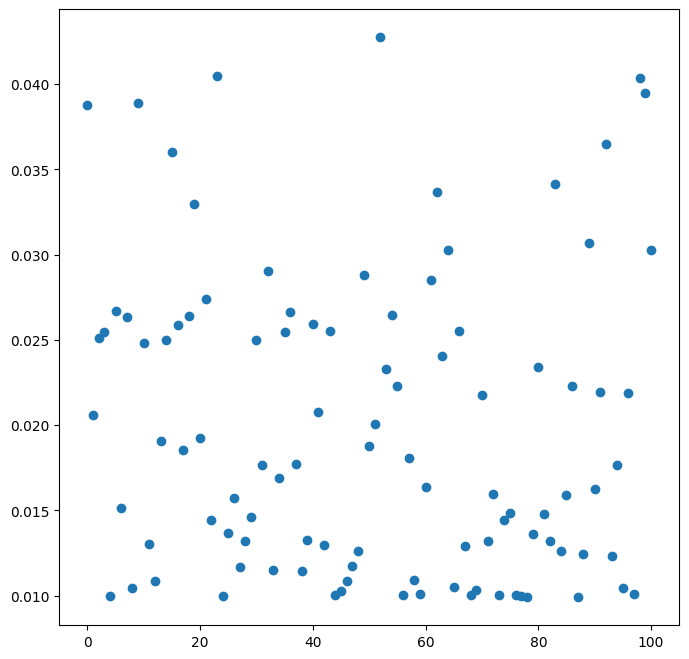

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

des = MS(['X1']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

infl = result.get_influence()
ax = plt.subplots(figsize = (8 , 8))[1]
ax.scatter(np.arange(x1.shape[0]) , infl.hat_matrix_diag)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           3.13e-08
Time:                        06:11:44   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.0

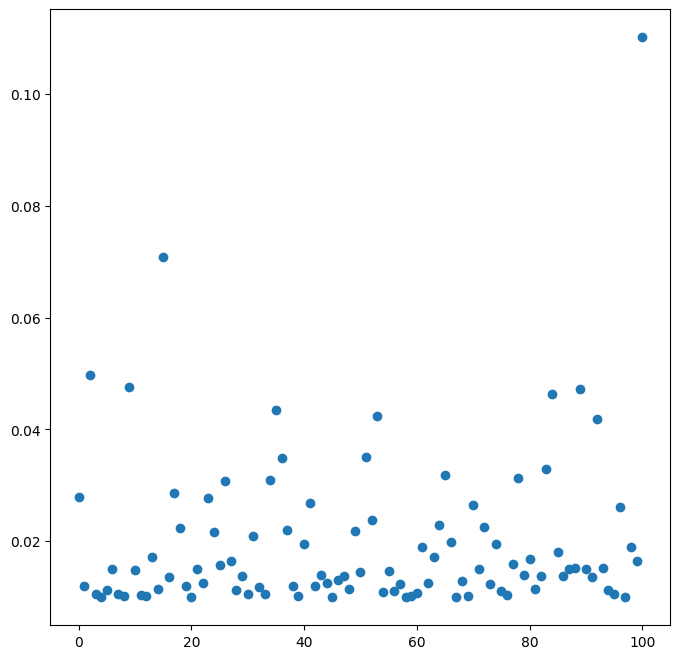

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

des = MS(['X2']).fit_transform(data)
model = sm.OLS(y , des)
result = model.fit()
print(result.summary())

infl = result.get_influence()
ax = plt.subplots(figsize = (8 , 8))[1]
ax.scatter(np.arange(x2.shape[0]) , infl.hat_matrix_diag)

- $\text{(g)}_\text{d}$, $\text{(g)}_\text{e}$: Both p-value of the regressions is small so we reject the null hypothesis

0.49090453878405194 0.22597653014709498 2.994899821246072


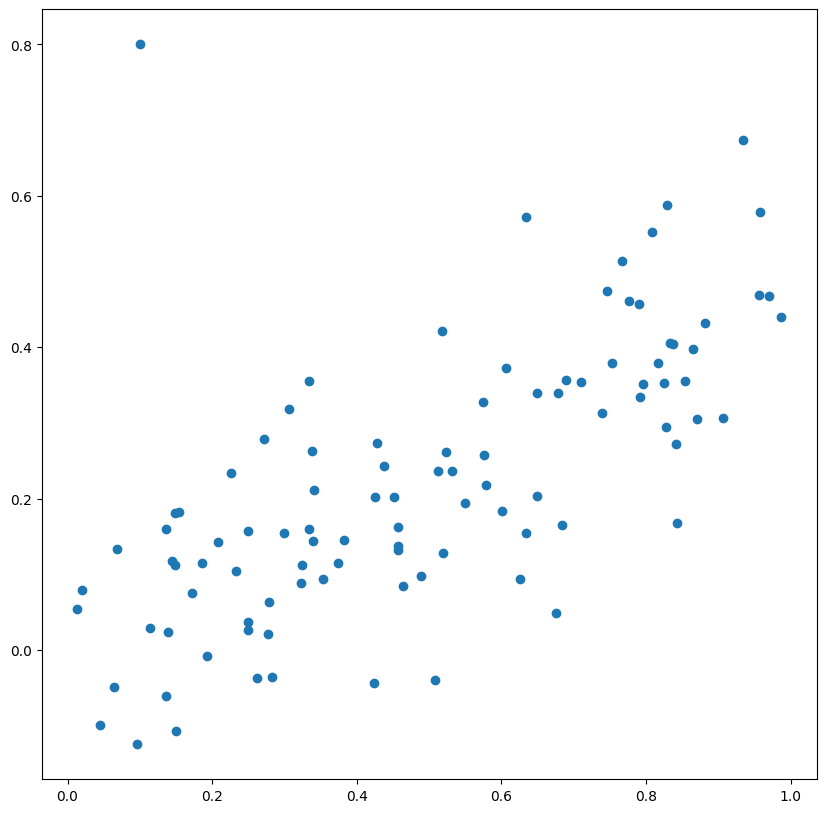

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

data  = pd.DataFrame({'X1' : x1 , 'X2' : x2})

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x1 , x2)

print(np.mean(x1) , np.mean(x2) , np.mean(y))



-(g): Based on plots and comparision the means, I can see this point is both a outlier and a leverage point:
  - In the plot index - leverage of the regression use to predict y using x2, the id = 100 point leverage is  way too high.
  - The means are: $\bar{X_1} = 0.49 , \bar{X_2} = 0.225, \bar{Y} = 2.994$ so the extra observation is kinda seperate to other points.

###15:

/tmp/ipython-input-941102819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax[(int)(cnt / 3) , cnt % 3] , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)
/tmp/ipython-input-941102819.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(predictor , ' coef = ' , result.params[1])
/tmp/ipython-input-941102819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax[(int)(cnt / 3) , cnt % 3

zn  coef =  -0.07393497740412348
indus  coef =  0.5097763311042313
chas  coef =  -1.8927765508037608
nox  coef =  31.248531201122923
rm  coef =  -2.684051224113948
age  coef =  0.10778622713953308


/tmp/ipython-input-941102819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax[(int)(cnt / 3) , cnt % 3] , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)
/tmp/ipython-input-941102819.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(predictor , ' coef = ' , result.params[1])
/tmp/ipython-input-941102819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax[(int)(cnt / 3) , cnt % 3

dis  coef =  -1.5509016824100994
rad  coef =  0.6179109273272014
tax  coef =  0.029742252822765353
ptratio  coef =  1.1519827870705868


/tmp/ipython-input-941102819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax[(int)(cnt / 3) , cnt % 3] , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)
/tmp/ipython-input-941102819.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(predictor , ' coef = ' , result.params[1])
/tmp/ipython-input-941102819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax[(int)(cnt / 3) , cnt % 3

lstat  coef =  0.5488047820623981
medv  coef =  -0.363159922257603


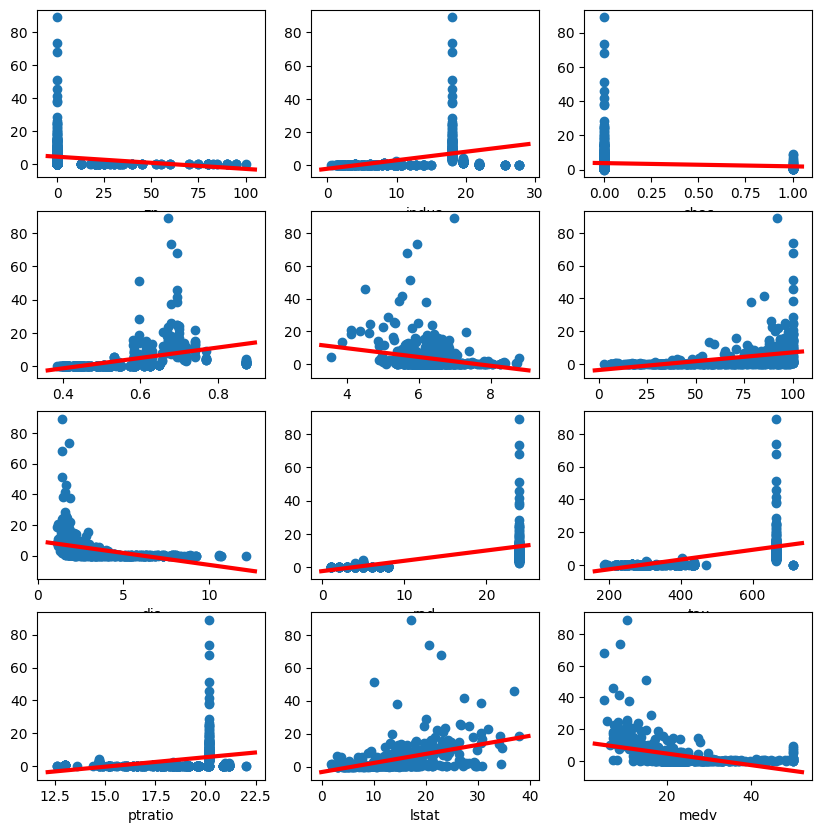

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Boston')

ax = plt.subplots(4 , 3 , figsize = (10 , 10))[1]

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [b + m * xlim[0] , b + m * xlim[1]]
  ax.plot(xlim , ylim , *args , **kwargs) ;

cnt = 0
for predictor in data.columns:
  if(predictor == 'crim'):
    continue

  des = MS([predictor]).fit_transform(data)
  model = sm.OLS(data['crim'] , des)
  result = model.fit()

  ax[(int)(cnt / 3) , cnt % 3].set_xlabel(predictor)
  ax[(int)(cnt / 3) , cnt % 3].scatter(data[predictor] , data['crim'])
  abline(ax[(int)(cnt / 3) , cnt % 3] , result.params[0] , result.params[1] , color = 'red' , linewidth = 3)
  cnt += 1


  print(predictor , ' coef = ' , result.params[1])

- (a): Based on R-squared, we can see that there are serveral predictors that statistically associated with the response, for example, rad and tax since R-squared values of them are the largest.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Boston')

des = MS(data.columns.drop('crim')).fit_transform(data)
model = sm.OLS(data['crim'] , des)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           2.03e-56
Time:                        08:13:29   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.0

- (b): We can reject the null hypothesis of dis, rad, medv.

/tmp/ipython-input-2424271742.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x.append(result.params[1]);
/tmp/ipython-input-2424271742.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x.append(result.params[1]);
/tmp/ipython-input-2424271742.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x.append(result.params[1]);
/tmp/ipython-input-2424271742.py:28: FutureWarning: Series.__getitem__ treating keys as positions is de

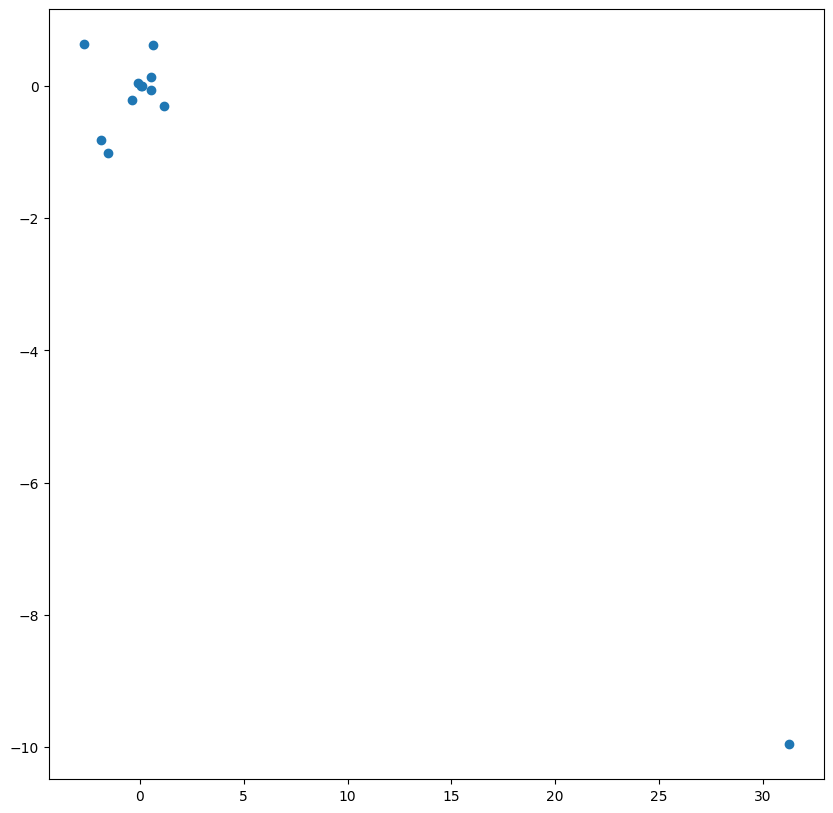

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Boston')

des = MS(data.columns.drop('crim')).fit_transform(data)
model = sm.OLS(data['crim'] , des)
result = model.fit()
y = result.params[1::]
x = []

for predictor in data.columns:
  if(predictor == 'crim'):
    continue

  des = MS([predictor]).fit_transform(data)
  model = sm.OLS(data['crim'] , des)
  result = model.fit()
  x.append(result.params[1]);

ax = plt.subplots(figsize = (10 , 10))[1]
ax.scatter(x , y)

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

data = load_data('Boston')

def abline(ax , b , m , *args , **kwargs):
  xlim = ax.get_xlim()
  ylim = [b + m * xlim[0] , b + m * xlim[1]]
  ax.plot(xlim , ylim , *args , **kwargs) ;

cnt = 0
for predictor in data.columns:
  if(predictor == 'crim'):
    continue

  des = MS([poly(predictor , degree = 3)]).fit_transform(data)
  model = sm.OLS(data['crim'] , des)
  result = model.fit()

  print(predictor , ' R-squared = ' , result.rsquared)

zn  R-squared =  0.05824197422258326
indus  R-squared =  0.2596578579195664
chas  R-squared =  0.0031238689633057426
nox  R-squared =  0.2969778956287361
rm  R-squared =  0.06778606116878572
age  R-squared =  0.17423099358657346
dis  R-squared =  0.2778247730867365
rad  R-squared =  0.40003687202422367
tax  R-squared =  0.36888207966296005
ptratio  R-squared =  0.11378157744698747
lstat  R-squared =  0.21793243242225624
medv  R-squared =  0.4202002565634151


- (d): Since the R-squared values are way better than the simple regression so there should be some non-linear association between predictors and response.